# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Isotrópico: en este caso son datos que tienen un patron

NOTA: tener en cuenta los factores de regularizacion (parametro c) son los que determinan los vectores de soporte

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

(250, 2) (250,)


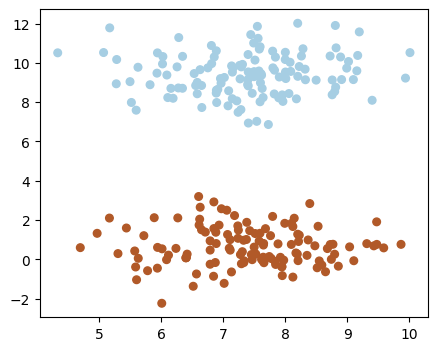

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples = 250 , centers = 2 , random_state = 8)
print(X.shape, y.shape)

_, ax=plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c = y , s = 30, cmap='Paired')


In [ ]:
clf = SVC(kernel = "linear" , C= 1 )

clf.fit(X,y)

SVC(C=1, kernel='linear')

De aqui pa abajo se aplica la función

In [ ]:
h_min, h_max = X[:,0].min()-0.5, X[:,0].max()+0.5
v_min, v_max = X[:,1].min()-0.5, X[:,1].max()+0.5

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 200), np.linspace( v_min , v_max , 200))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(),v_grid.ravel()] )
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape )
print (pred_grid.shape)

(40000,)
(200, 200)


3


[]

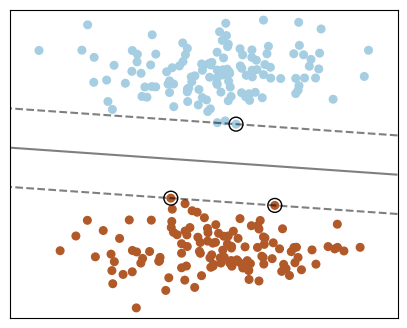

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , s = 30, cmap = "Paired")

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print(len(clf.support_vectors_)) #esto devuelve cuantos vectores de soporte hay

#ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
#ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

([], [])

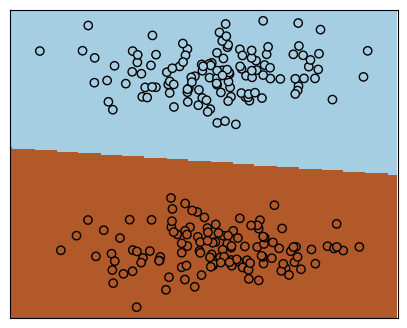

In [ ]:
pred_grid = clf.predict( np.c_[h_grid.ravel(),v_grid.ravel()] )
pred_grid= pred_grid.reshape(h_grid.shape)

_, ax = plt.subplots (figsize=(5,4))
ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = "Paired")
ax.scatter( X[:,0] , X[:,1] , c = y , edgecolor='k', cmap = "Paired")

ax.set_xticks([]),ax.set_yticks([])


## In real data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

In [2]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2]  # Pick 2 features
Y = iris.target

In [3]:
# Create an instance of SVM and fit the data.
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

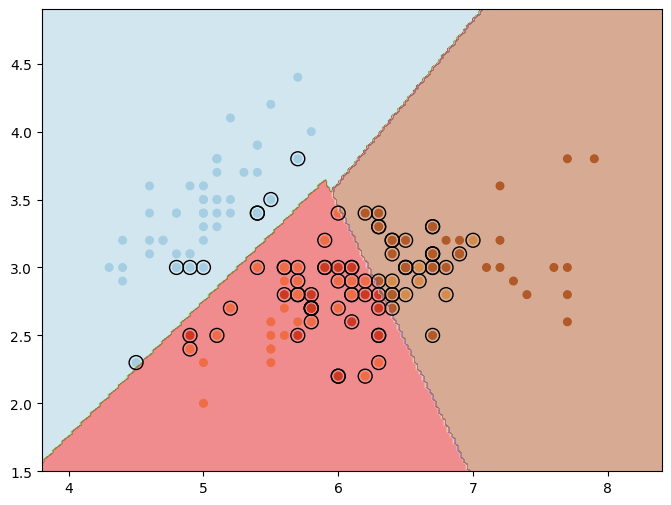

In [9]:
# Plot decision boundaries

# Create a grid to plot decision boundaries
h_min, h_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
v_min, v_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 200), np.linspace(v_min, v_max, 200))

# Predict the values of the grid
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])  # Use predict instead of decision_function
pred_grid = pred_grid.reshape(h_grid.shape)

# Plot decision boundaries and margins
_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap='Paired')

# Plot decision boundary
contour = ax.contourf(h_grid, v_grid, pred_grid, alpha=0.5, cmap='Paired')

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


plt.show()